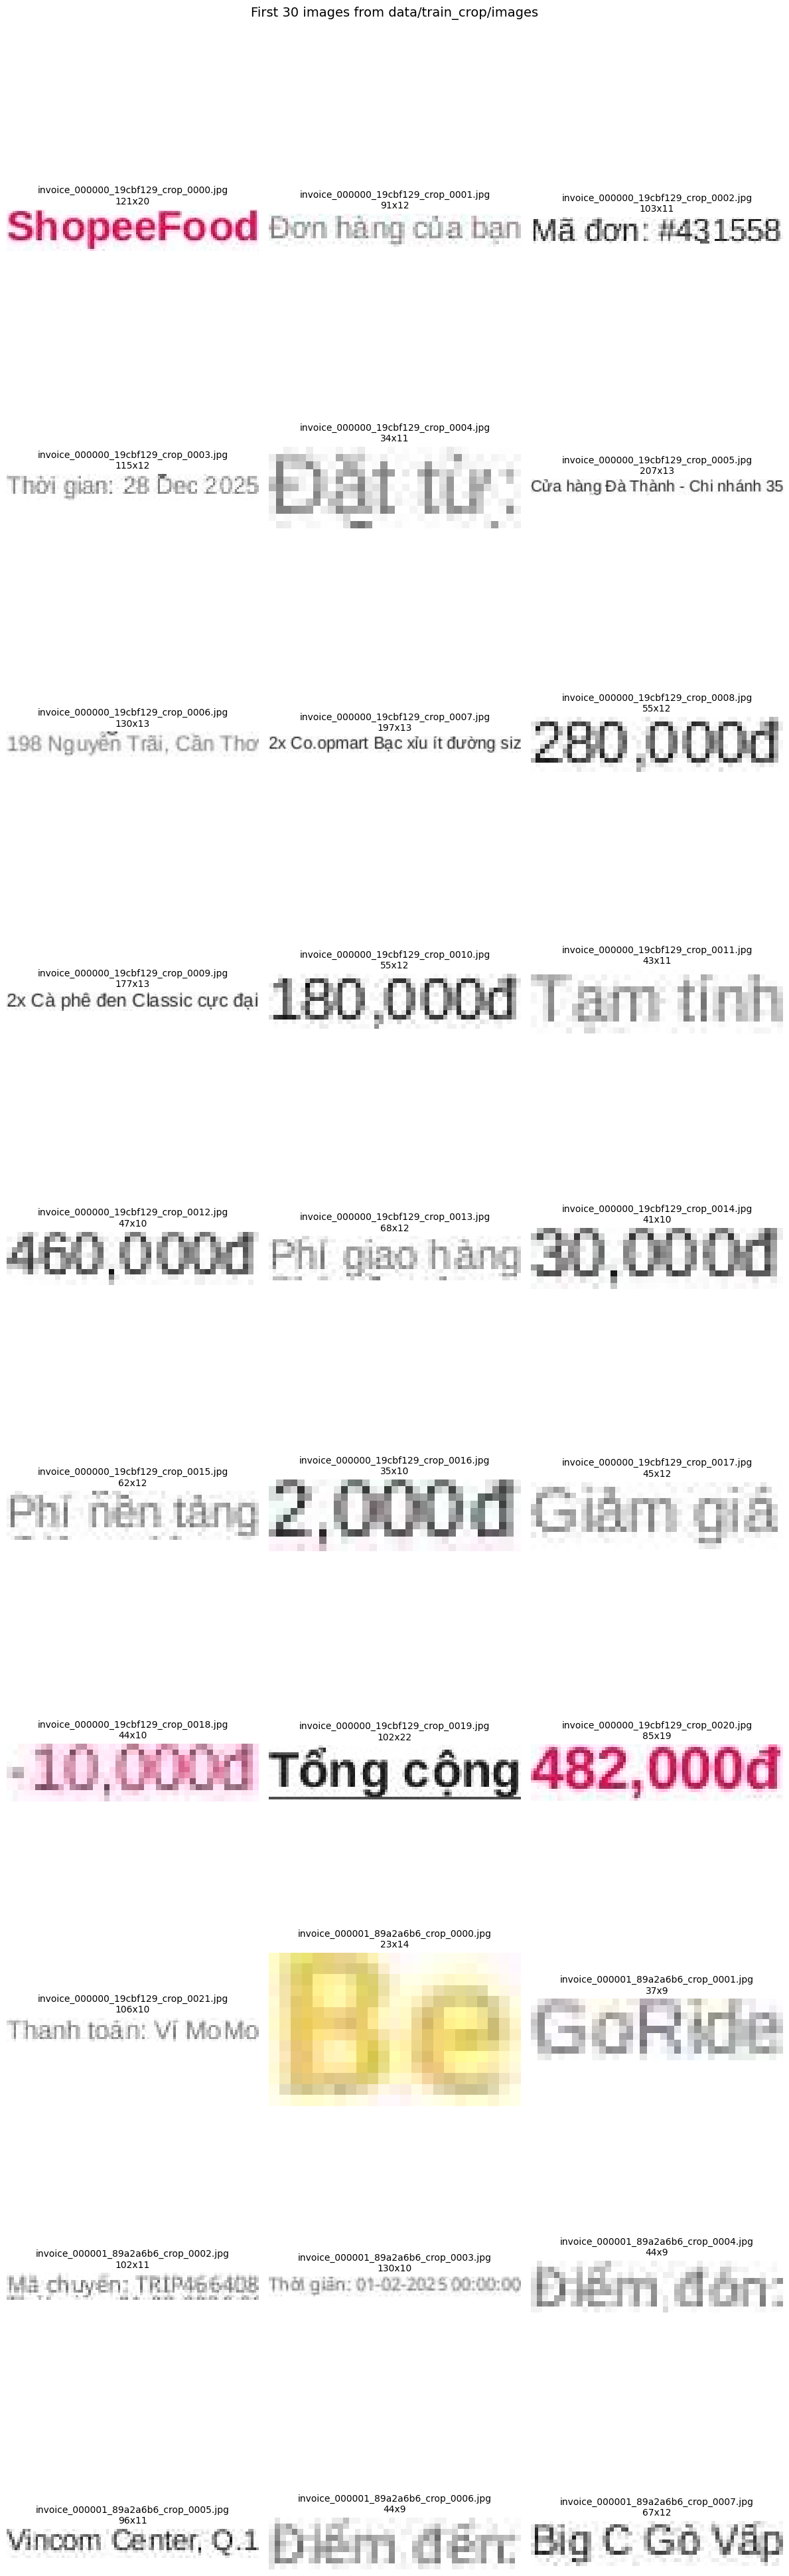

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

def visualize_first_n_images(folder_path, n=5):
    """
    Display the first n images from a folder in a grid layout
    
    Parameters:
        folder_path: Path to the folder containing images
        n: Number of images to display (default: 5)
    """
    # Supported image extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp')
    
    # Get all image files from the folder
    image_files = [f for f in os.listdir(folder_path) 
                   if f.lower().endswith(image_extensions)]
    image_files.sort()
    
    # Take first n images
    image_files = image_files[:n]
    
    if not image_files:
        print(f"No images found in {folder_path}")
        return
    
    # Calculate grid layout
    num_images = len(image_files)
    cols = min(3, num_images)  # Max 3 columns
    rows = (num_images + cols - 1) // cols
    
    # Create figure
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    if num_images == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows > 1 else axes
    
    # Display each image
    for idx, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        try:
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(f'{img_file}\n{img.size[0]}x{img.size[1]}', fontsize=10)
            axes[idx].axis('off')
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'Error loading\n{img_file}', 
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].set_title(img_file, fontsize=10)
            axes[idx].axis('off')
    
    # Hide empty subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'First {num_images} images from {folder_path}', y=1.02, fontsize=14)
    plt.show()

# Example usage - replace with your folder path
folder_path = 'data/train_crop/images'
visualize_first_n_images(folder_path, n=30)